In [1]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 200

Index(['Date', 'MSFT', 'MU', 'INTC', 'XOM', 'GE', 'CVX', 'C', 'BAC', 'JPM',
       'DIS'],
      dtype='object')
Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.568 Seconds
Building M ...
	Done. Took 0.541 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished lsq: Error = 193.023
	Done. Took 6.954 Seconds
Extracting Qis ...
	Done. Took 0.001 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- GE: -6.704*(-0.568)^t + -2.500*(-0.212)^t + 9.525*(-0.467)^t + 4.638*(0.153)^t + -4.958670 * delta(t,0)
		RMSE = 0.178
		Matlab: [-6.7  -0.57 -2.5  -0.21  9.53 -0.47  4.64  0.15]
	Done. Took 4.571 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- CVX: 1.990*(0.139)^t + -0.906*(0.323)^t + 2.743*(0.158)^t + -7.495*(-0.034)^t + 3.668382 * delta(t,0)
		RMSE = 0.031
		Matlab: [ 1.99  0.14 -0.91  0.32  2.74  0.16 -7.49 -0.03]
	Done. Took 7.999 Seconds
Learning Convolution for Q(2,1) ...

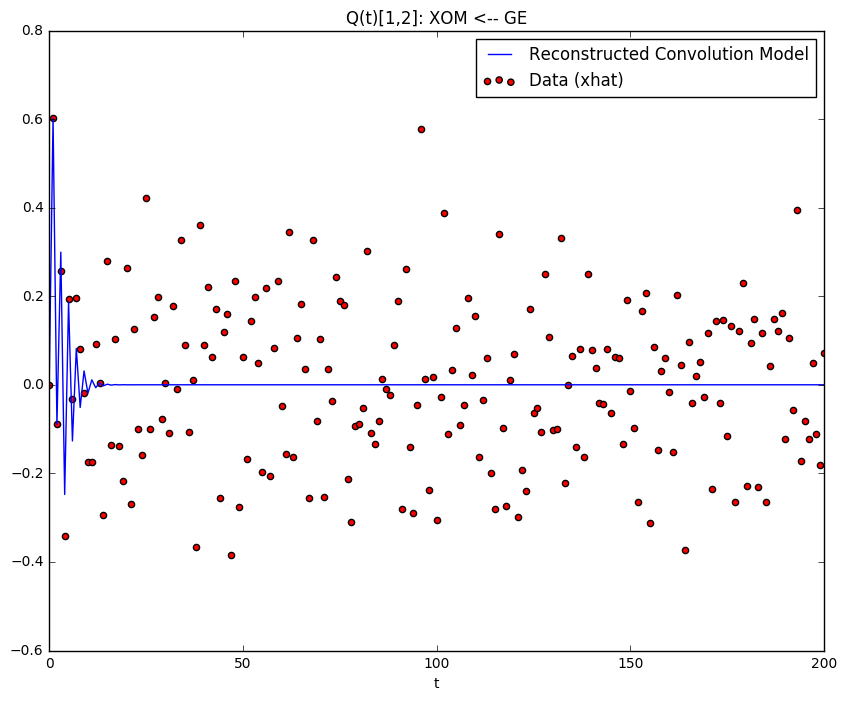

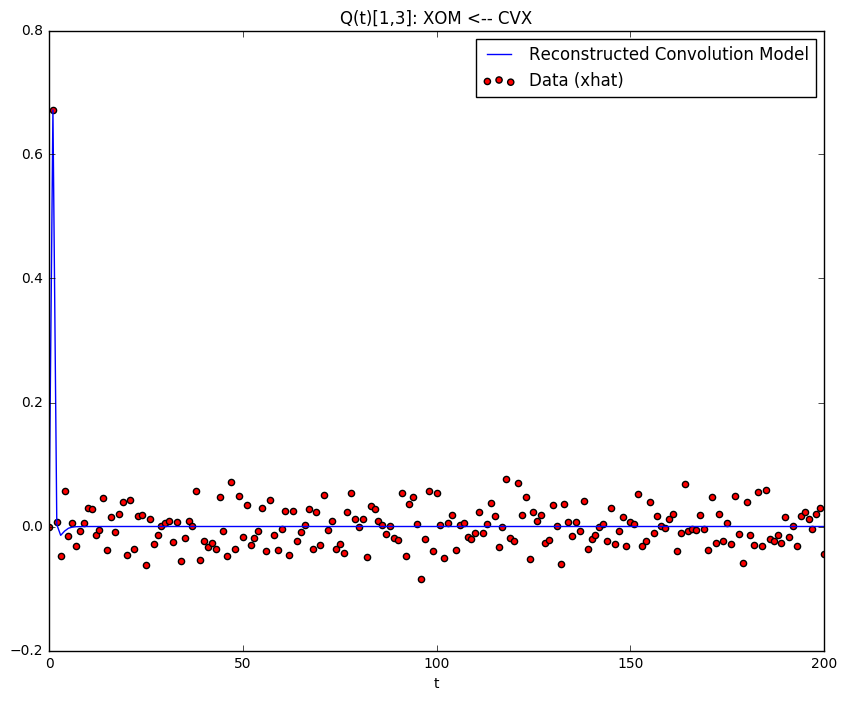

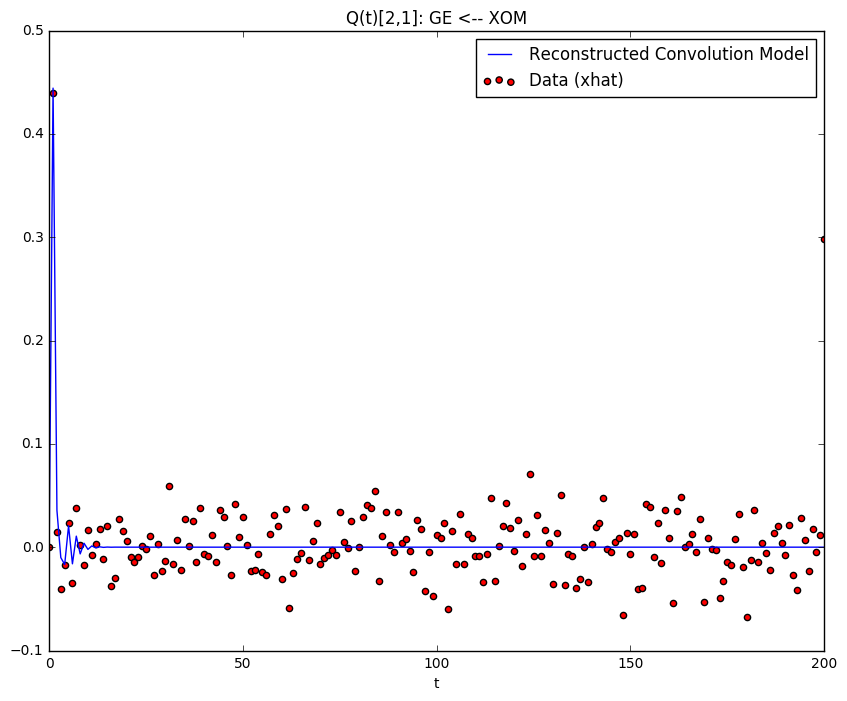

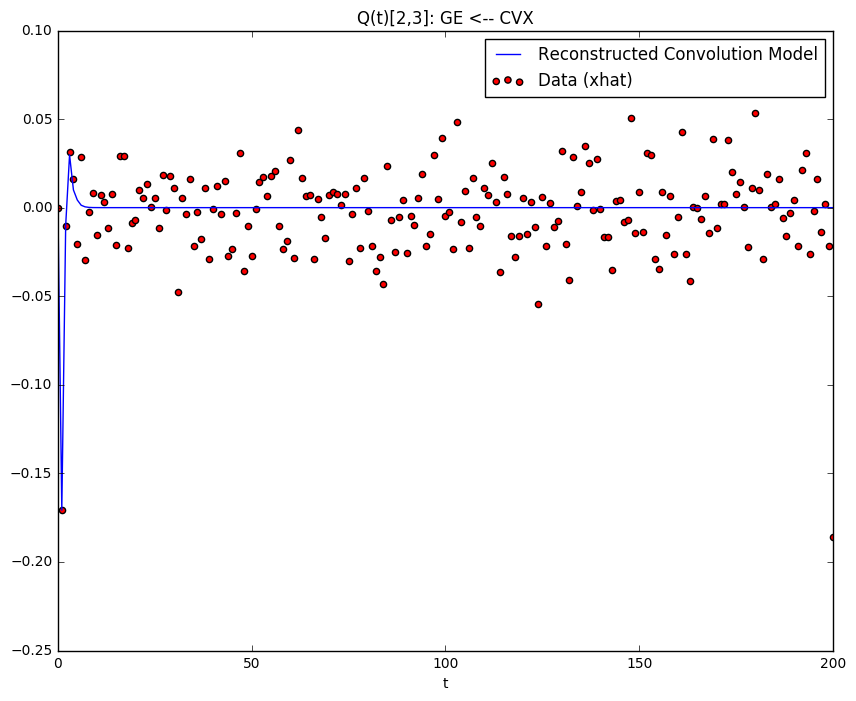

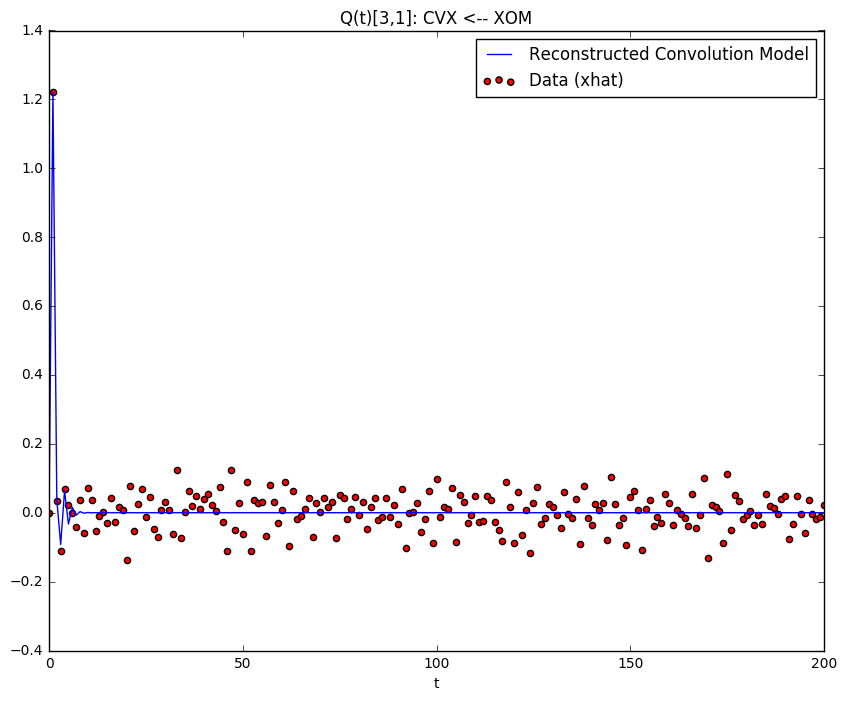

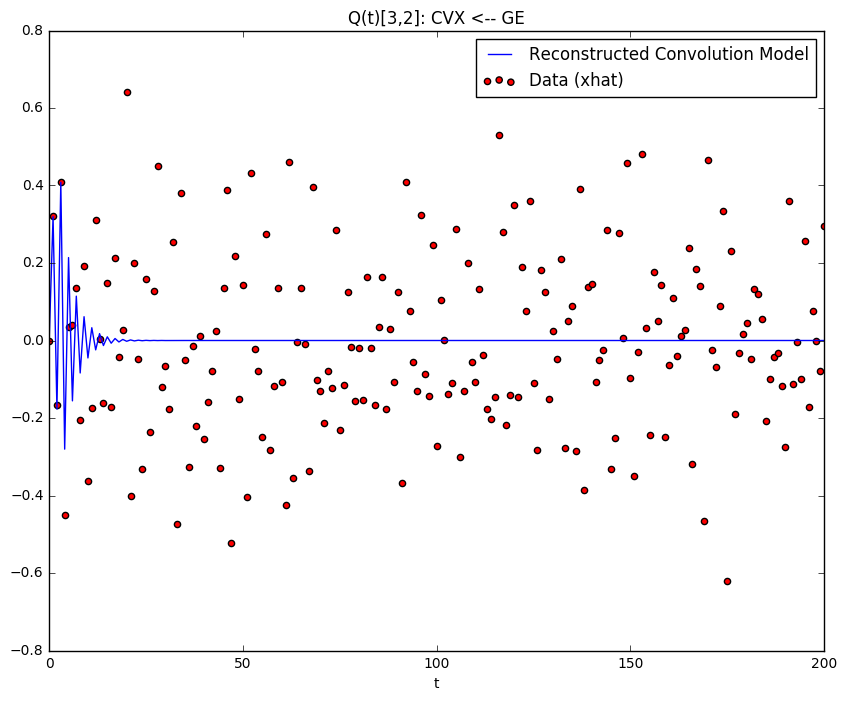

In [2]:
%matplotlib inline
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)
print(y.columns)
cols = [col for col in y.columns if col != 'Date']
cols = ['XOM', 'GE', 'CVX']
y = y[cols].values
securities = cols

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=False)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [3]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([-6.70427068047 -0.56819128434 -2.50018874885 -0.211823843049 9.52516688295 -0.467113257459 4.63796284799 0.153461774787 ; 1.9899905991 0.13883959707 -0.906288468674 0.323242230502 2.74281838556 0.157674934575 -7.4949029088 -0.0341782661211 ; 4.15126894499 -0.398607741307 -8.34777748681 -0.158429311224 -1.47903016573 -0.529586593772 0.115667143007 -0.0592583552672 ; 2.66342101749 0.296597332887 -4.90033677955 0.210070981776 2.91241251789 -0.0350853277559 -0.924502568326 -0.184814992086 ; 3.24209971909 0.0898638073975 -8.3007253777 -0.240516238375 0.521681604801 0.105789149817 2.58846720416 -0.433349303713 ; -1.00821959445 -0.732766416213 3.29150953676 -0.134742354443 6.75412013901 -0.134128802889 4.72773038077 0.196737219487], {'XOM', 'GE', 'CVX'});


In [4]:
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)

print(y['Date'].min())
print(y['Date'].max())

2012-01-06
2016-10-13


Index(['Date', 'MSFT', 'MU', 'INTC', 'XOM', 'GE', 'CVX', 'C', 'BAC', 'JPM',
       'DIS'],
      dtype='object')
Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.505 Seconds
Building M ...
	Done. Took 0.486 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 1.276 Seconds
Extracting Qis ...
	Done. Took 0.011 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) XOM <-- GE: 1.035*(0.059)^t + -4.479*(-0.032)^t + 3.431*(0.038)^t + -2.247*(-0.041)^t + 2.260172 * delta(t,0)
		RMSE = 0.020
		Matlab: [ 1.04  0.06 -4.48 -0.03  3.43  0.04 -2.25 -0.04]
	Done. Took 13.538 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) XOM <-- CVX: 1.748*(-0.164)^t + -5.743*(-0.104)^t + -0.318*(-0.087)^t + 3.862*(0.068)^t + 0.451231 * delta(t,0)
		RMSE = 0.003
		Matlab: [ 1.75 -0.16 -5.74 -0.1  -0.32 -0.09  3.86  0.07]
	Done. Took 40.864 Seconds
Learning Convolution for Q(2,1) ...


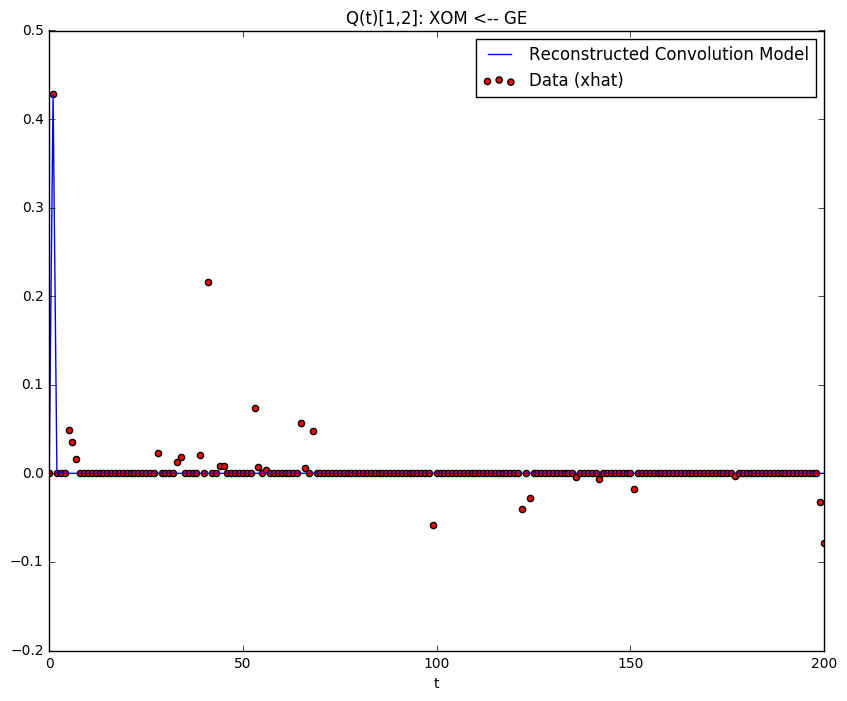

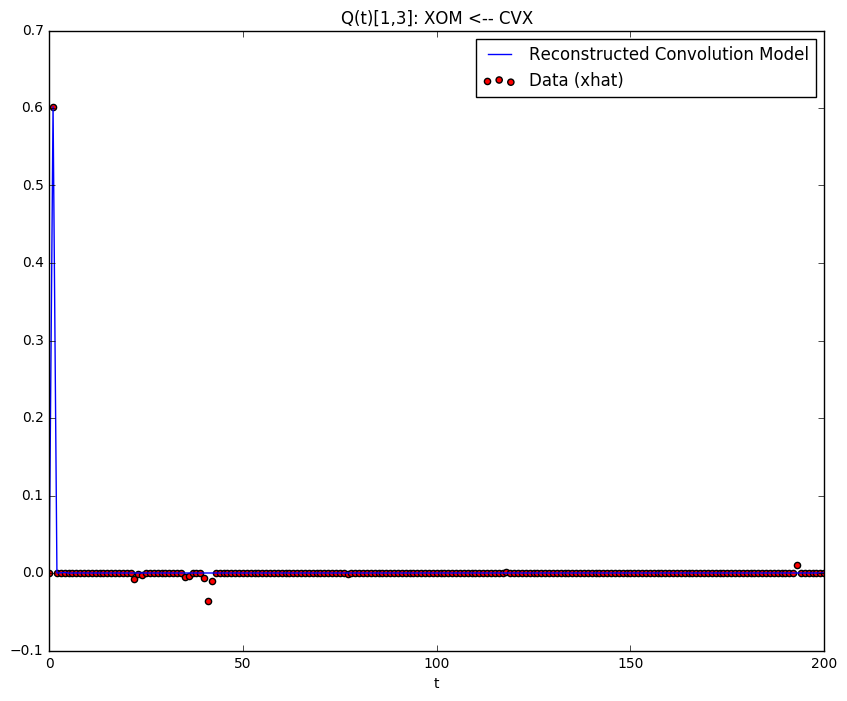

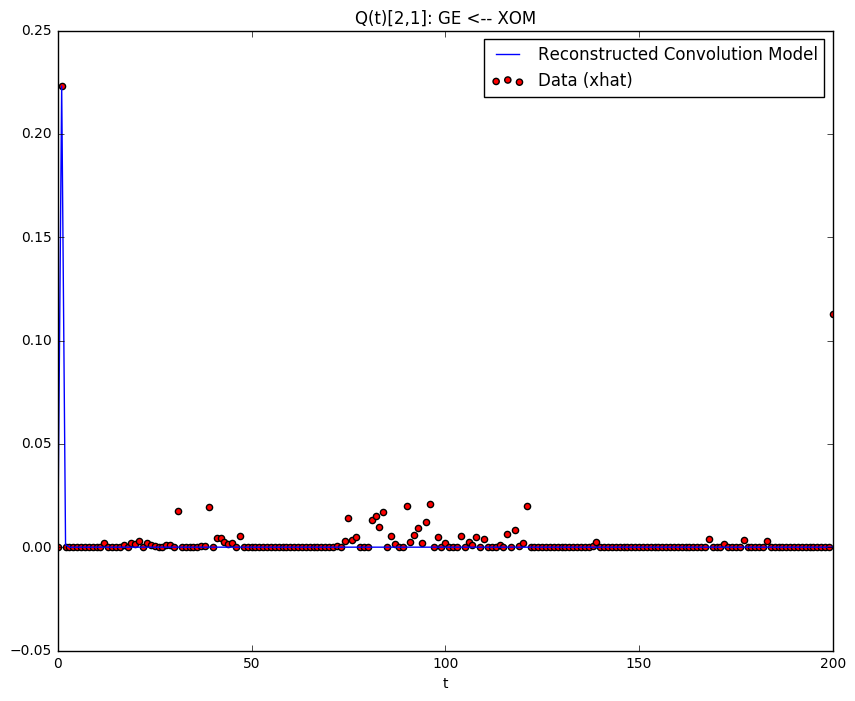

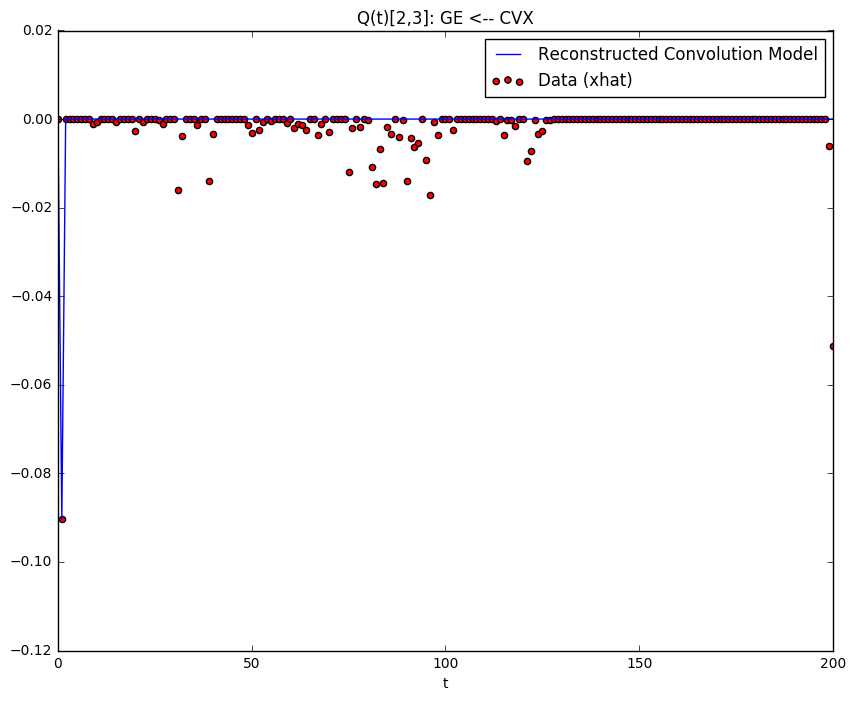

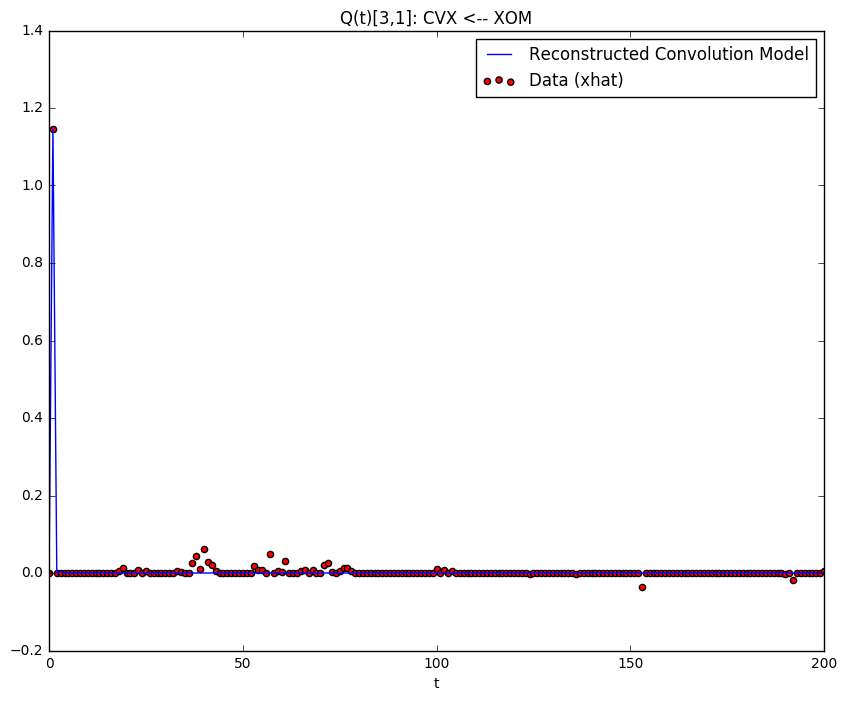

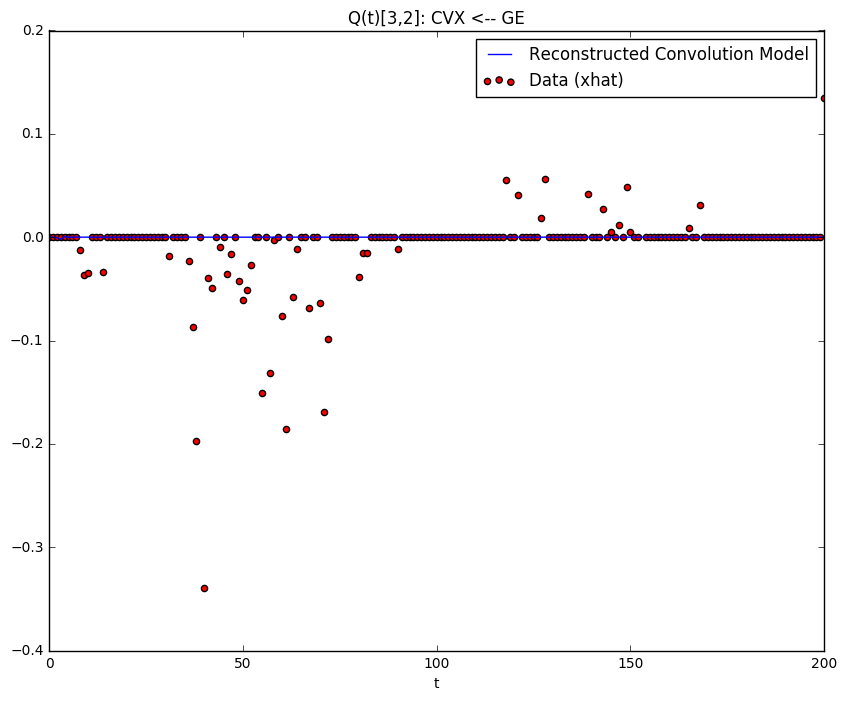

In [5]:
%matplotlib inline
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)
print(y.columns)
cols = [col for col in y.columns if col != 'Date']
cols = ['XOM', 'GE', 'CVX']
y = y[cols].values
securities = cols

titles = {i + 1: sec for i, sec in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=10, order=4, robust=True)
rs = recon.unmeasured(y, plot=True, titles=titles)

flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))

In [6]:
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

vulnerabilities([1.03530796128 0.0594454575178 -4.47919386158 -0.0324472130551 3.4308370549 0.0375492848419 -2.24712276362 -0.040952429503 ; 1.74762398323 -0.164362240554 -5.74278659152 -0.104373535051 -0.317915270752 -0.0870544768181 3.86184683174 0.0678081571514 ; -1.75830357373 -0.0189723529267 -0.132350022623 0.0987535424406 7.54854076894 0.0214517122932 -4.42650596506 -0.00923969800319 ; 2.20509649828 -0.00799289193903 -0.309529135888 0.0706443496702 1.71249721119 -0.0327881055479 -0.083073020365 -0.0633427258574 ; 9.35917604927 0.0596973412106 -1.84469653452 -0.0401362760428 -5.31380840273 -0.0525640071264 -3.46866732749 -0.0671394245457 ; 1.51478053428 -0.173858026057 -9.47098462845 0.00838051389901 -2.67191984764 -0.130681553603 8.1414916126 -0.000790995980448], {'XOM', 'GE', 'CVX'});


In [7]:
y = pd.read_csv('short.csv')
y = y.sort_values(by='Date')
y = y.tail(R * 6 + 1)
print(len(y))

1201
